# Import relevant libraries & Data

In [1]:
!pip install -r requirements.txt

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
sns.set()

In [28]:
df = pd.read_csv('data/train.csv');

# Basic EDA

## First look at the dataset

In [29]:
# take a look at a couple of the first rows
df.head(3)

id  log_price property_type        room_type  \
0  6901257   5.010635     Apartment  Entire home/apt   
1  6304928   5.129899     Apartment  Entire home/apt   
2  7919400   4.976734     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude  longitude  \
0  Real Bed              strict          True  ...  40.696524 -73.991617   
1  Real Bed              strict          True  ...  40.766115 -73.989040   
2  Real Bed            moderate          True  ...  40.808110 -73.943756   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   

                                       thumbnail_url zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027      1.0   3.0  

[3 rows x 29 columns]

In [30]:
# How many rows and columns the DS has
print("Num cols", df.shape[1])
print("Num rows", df.shape[0])

Num cols 29
Num rows 74111


In [31]:
# List columns, types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [32]:
# Describe numerical features except the id
df.drop(columns=["id"], axis=1).describe()

log_price  accommodates     bathrooms      latitude     longitude  \
count  74111.000000  74111.000000  73911.000000  74111.000000  74111.000000   
mean       4.782069      3.155146      1.235263     38.445958    -92.397525   
std        0.717394      2.153589      0.582044      3.080167     21.705322   
min        0.000000      1.000000      0.000000     33.338905   -122.511500   
25%        4.317488      2.000000      1.000000     34.127908   -118.342374   
50%        4.709530      2.000000      1.000000     40.662138    -76.996965   
75%        5.220356      4.000000      1.000000     40.746096    -73.954660   
max        7.600402     16.000000      8.000000     42.390437    -70.985047   

       number_of_reviews  review_scores_rating      bedrooms          beds  
count       74111.000000          57389.000000  74020.000000  73980.000000  
mean           20.900568             94.067365      1.265793      1.710868  
std            37.828641              7.836556      0.852143      1.254142  
min             0.000000             20.000000      0.000000      0.000000  
25%             1.000000             92.000000      1.000000      1.000000  
50%             6.000000             96.000000      1.000000      1.000000  
75%            23.000000            100.000000      1.000000      2.000000  
max           605.000000            100.000000     10.000000     18.000000

<AxesSubplot:>

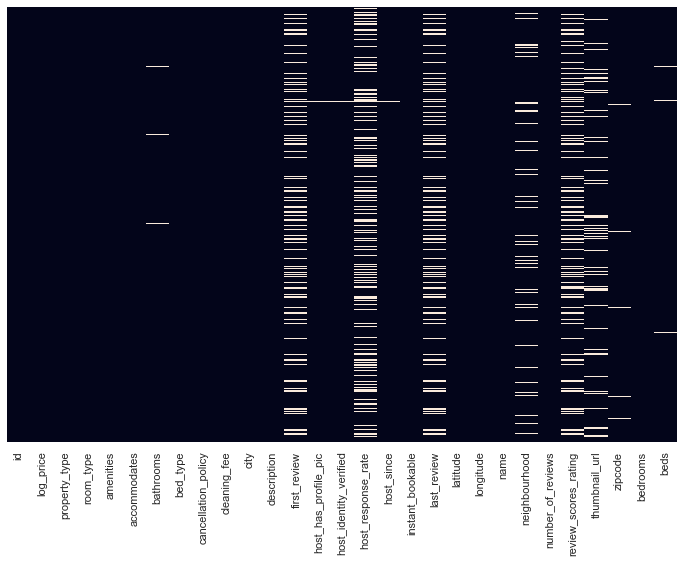

In [33]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [34]:
# Get last quantiles for relevant quantifiable numerical features
df[['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds' ]].quantile([0.90, 0.95, 0.99])

log_price  accommodates  bathrooms  bedrooms  beds
0.90   5.703782           6.0        2.0       2.0   3.0
0.95   6.052089           7.0        2.0       3.0   4.0
0.99   6.894467          12.0        3.5       4.0   6.0

Right away I can start to identify what kind of features I can work with and what can be ignored.

Things like the URL for the thumbnail, description, first review, name won't add value to our predictions.

Since ML models only work with numerical data, there're several features that will have to be transform in order to use them. We have categorical columns: 

- property_type
- room_type
- bed_type
- cancellation_policy
- city
- instant_bookable
- neighbourhood

One of the most important column is "Amenities", right now it's a dictionary, when we tranform it to columns, our data will get very wide and that's something to keep in mind.

Regarding null values, fortunately most of them belong to columns that we won't be using, so all in all it's a pretty clean dataset

In [35]:
# Drop columns we will not be using
df.drop(columns=['description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'name', 'thumbnail_url'], inplace=True)

## Visualizing the data

### Quantifiable

Text(0.5, 1.0, 'Price density plot')

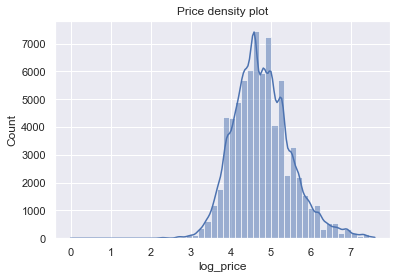

In [36]:
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Price density plot')

We have to be careful of how we handle the price, since it's in a logarithmic scale and not in USD as one would expect

<AxesSubplot:xlabel='accommodates', ylabel='Count'>

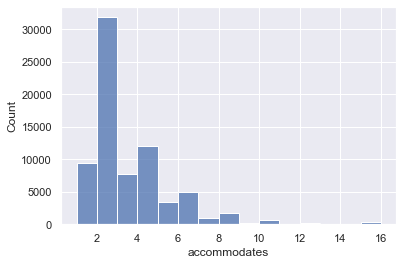

In [37]:
sns.histplot(df['accommodates'], bins=15)

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

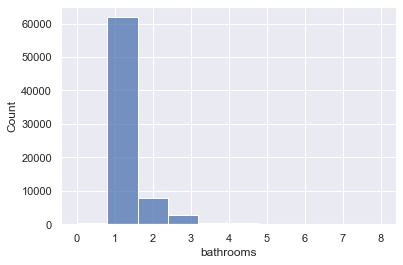

In [38]:

sns.histplot(df['bathrooms'], bins=10)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

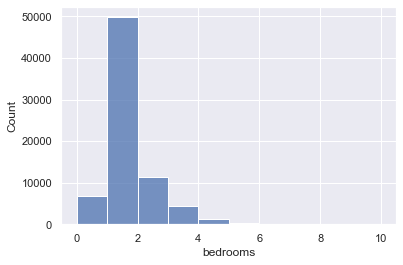

In [39]:
sns.histplot(df['bedrooms'], bins=10)

<AxesSubplot:xlabel='beds', ylabel='Count'>

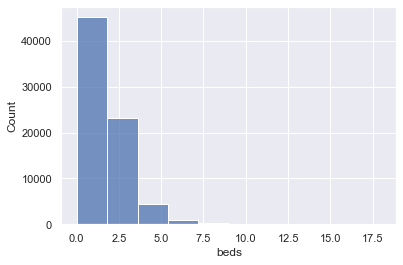

In [40]:
sns.histplot(df['beds'], bins=10)

From this general view, one could far fetch that most places are small, or focused on small group of renters. Since, we see a high pick in places that accommodate less than 4 people, also most places have less than 3 bedrooms

### Correlations against Price

This is a pretty important section since here we would compare most features and identity how they increase/decrase the price of an AirBnB. From the things we can find here we can construct the final form of the app.

<AxesSubplot:>

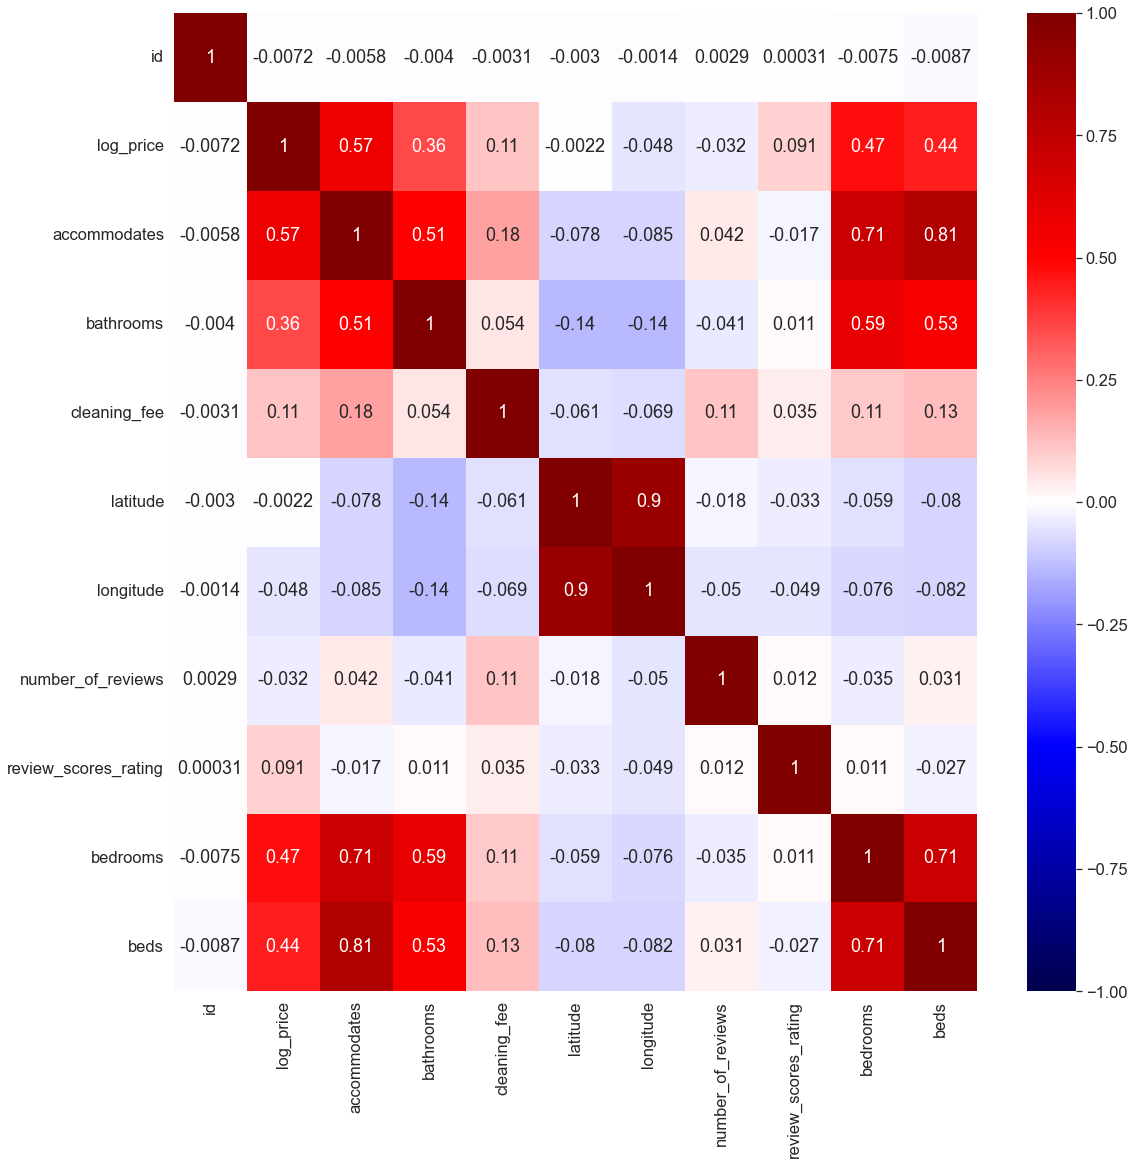

In [41]:
# General correlation between all features
sns.set(font_scale=1.5)
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

Unsurprisingly, at a first glance we can see that the feature that are the most positively correlated to the price are the Accomodates, Bathrooms, Bedrooms and Beds. This can be helpful information, when asking the users about their place.

For me it's weird that, number of reviews influences negatively the price of a place and that the review scores rating aren't adding that much value, since one strategy airbnb offers for filtering is the reviews.

Having this results in mind let's look specifically at this features.

Text(0.5, 1.0, 'Boxplot: Price vs Accomodates')

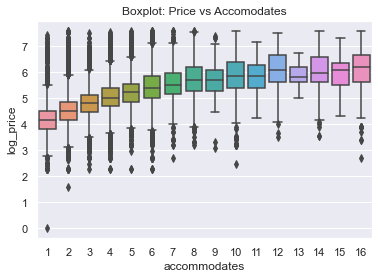

In [42]:
sns.set(font_scale= 1)
sns.boxplot(x='accommodates', y='log_price', data=df)
plt.title('Boxplot: Price vs Accomodates')

Text(0.5, 1.0, 'Boxplot: Price vs Bathrooms')

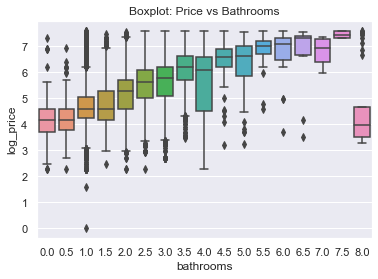

In [43]:
sns.boxplot(x='bathrooms', y='log_price', data=df)
plt.title('Boxplot: Price vs Bathrooms')

Text(0.5, 1.0, 'Boxplot: Price vs Bedrooms')

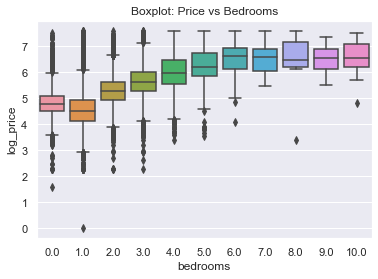

In [44]:
sns.boxplot(x='bedrooms', y='log_price', data=df)
plt.title('Boxplot: Price vs Bedrooms')

Text(0.5, 1.0, 'Boxplot: Price vs Beds')

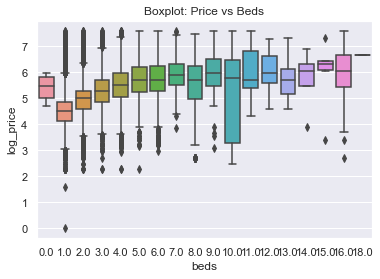

In [45]:
sns.boxplot(x='beds', y='log_price', data=df)
plt.title('Boxplot: Price vs Beds')

This gives us a clearer understanding of how the data is distribuited. Accommodates and Bedrooms are very uniform. On the other hand Bathrooms and Beds have a some outliers but still we can visualize that generally the higher the amount, the higher the price.

This phase is not over, it definitely should be revisited once we have feature engineer'ed categorical variables like the city, neighbourghood, and ammenities.

Something that comes to mind is that the latitude and longitude should also be an important factor, but, as this kind of data has such a high spread, it's hard to determine anything yet, anyway I would gravitate towards using the City+Neighbourhood to draw conclusions regarding the location. Another solution would be to adjust lat and long to have a higher radius, so that it can be in a more delimited space, the down side is that this would turn it into a categorical feature.

### Categorical Features

Text(0, 0.5, 'Property Type')

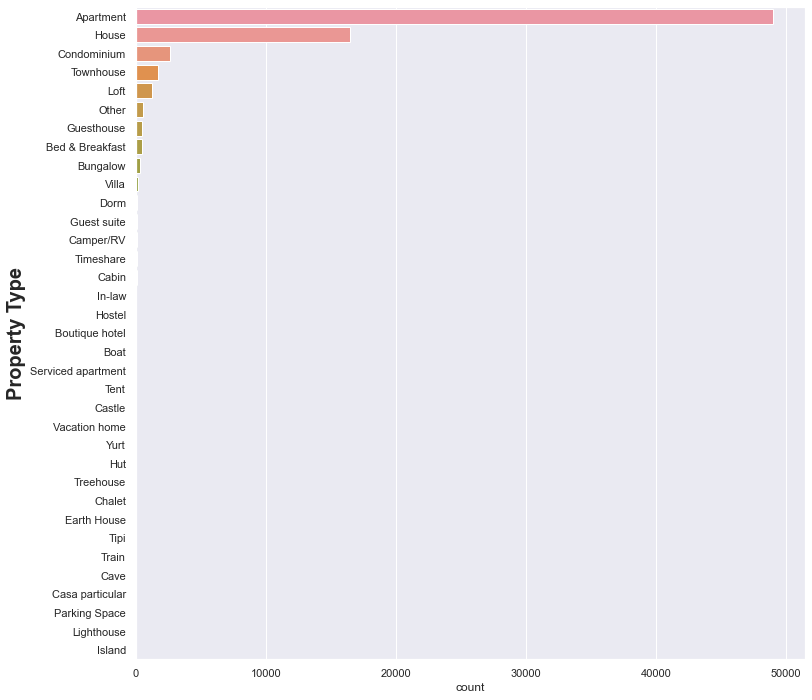

In [46]:
# Property Type
plt.figure(figsize=(12, 12))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.ylabel('Property Type', fontsize=20, weight='bold')

Text(0, 0.5, 'Room Type')

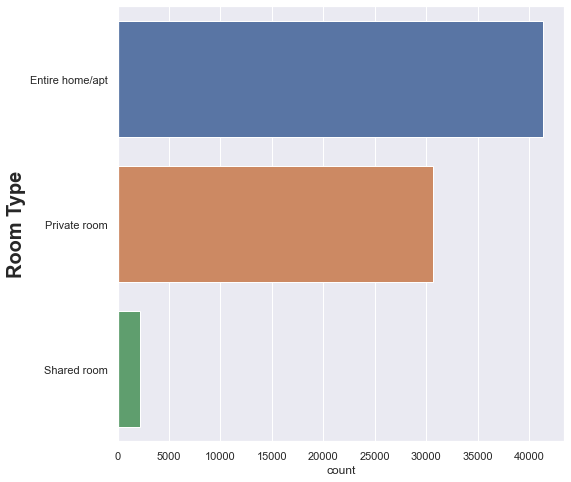

In [47]:
# Room type
plt.figure(figsize=(8, 8))
sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
plt.ylabel('Room Type', fontsize=20, weight='bold')

Text(0, 0.5, 'Cancellation Policy')

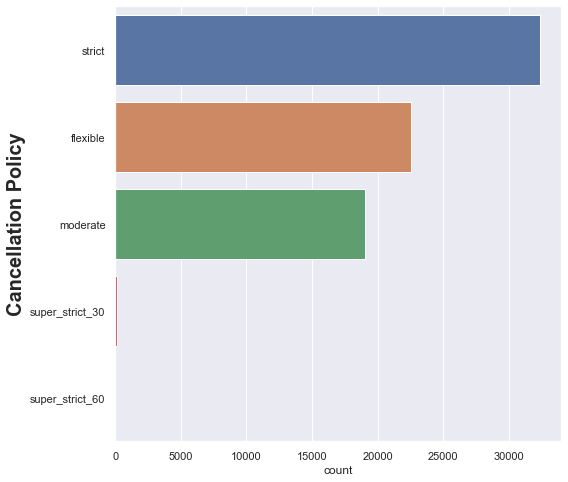

In [48]:
# Cancellation Policy
plt.figure(figsize=(8, 8))
sns.countplot(y='cancellation_policy', data=df, order=df['cancellation_policy'].value_counts().index)
plt.ylabel('Cancellation Policy', fontsize=20, weight='bold')

<BarContainer object of 10 artists>

<Figure size 864x864 with 0 Axes>

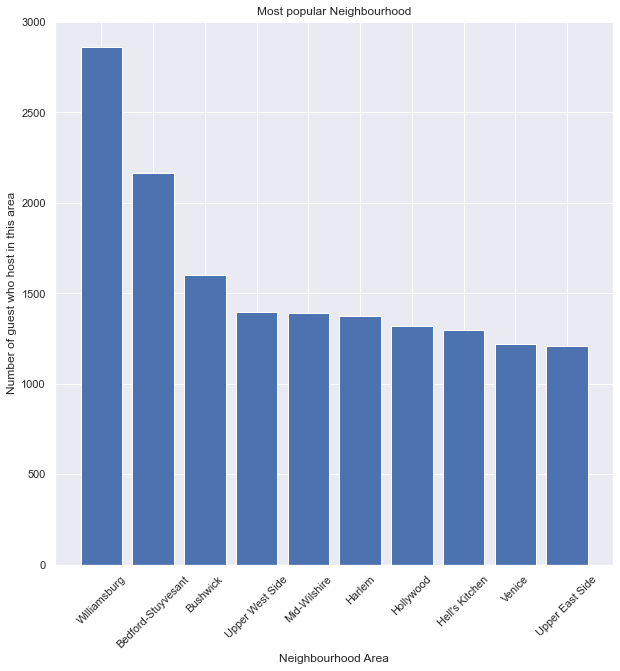

In [49]:
plt.figure(figsize = (12,12))
# Only the first 10 most visited
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10,10))

x = data.index
y = data.values

plt.title("Most popular Neighbourhood")
plt.xlabel("Neighbourhood Area")
plt.ylabel("Number of guest who host in this area")
plt.xticks(rotation=45)
plt.bar(x,y)

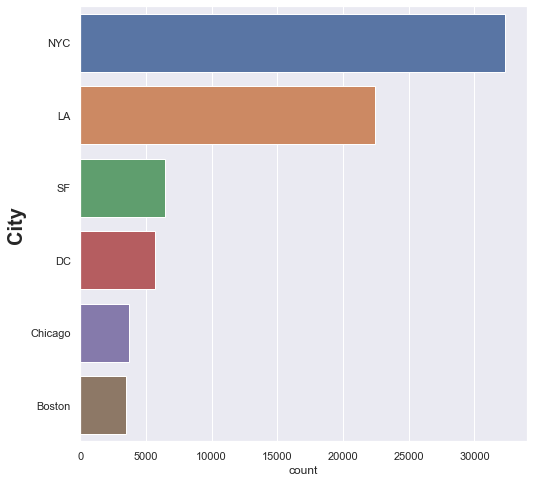

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(y = 'city',data = df,order = df['city'].value_counts().index)
plt.ylabel('City',fontsize = 20, weight = 'bold')
plt.show()

Looking at the property type variable we can see that there are several types that have way to low values, maybe we can encapsule them into one or multiple types so that we dont end up with data so skewed.

As there are so many neighbourhoods we have to think of how to manage this in tandem with the city variable

### Visualizing location data

In [51]:
def create_map(city='NYC'):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    fraction = 0.6
    # This cities have a larger area with places to rent
    if city in {'NYC', 'LA'}:
        fraction = 0.2

    df_temp = df[df['city'] == city].sample(frac=fraction, random_state=123)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)

    fig = px.scatter_mapbox(
        df_temp,
        lat='latitude',
        lon='longitude',
        hover_data=['log_price'],
        color='log_price',
        zoom=10
    )

    fig.update_layout(
        title=f'AirBnB prices in {city}',
        geo_scope='usa',
        width=1000,
        height=600,
        mapbox_style='white-bg',
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
        }]
    )

    fig.show()

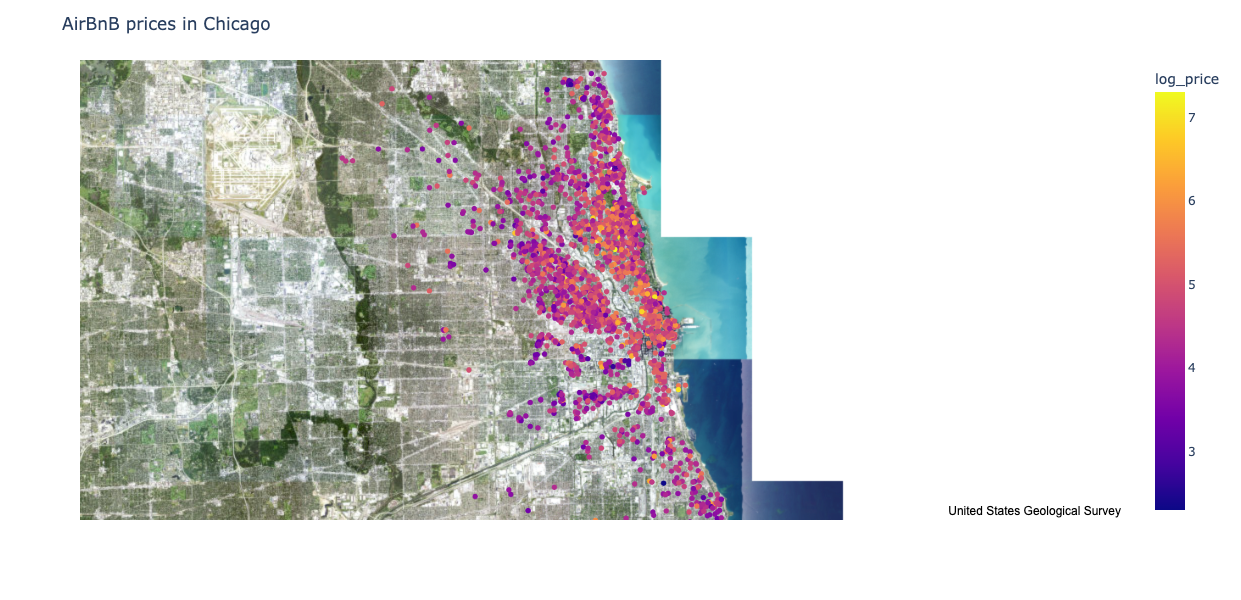

In [52]:
create_map('Chicago')

In [53]:
def folium_map(coords=[41.866, -87.652]):
    folium_hmap = folium.Map(location=coords, zoom_start=13, titles='OpenSteetMap')
    # Arrange the location with the price to create the heatmap layer
    zip_location_price = zip(df['latitude'], df['longitude'], df['log_price'])
    list_location_price = list(zip_location_price)

    # Add layer to original map
    hm_layer = HeatMap(list_location_price, min_opacity=0.2, radius=8, blur=6)
    folium_hmap.add_child(hm_layer)
    return folium_hmap

In [54]:
chicago_coords= [41.866, -87.652]
new_york_coords = [40.749, -73.986]
la_coords = [33.804, -118.211]
sf_coords = [37.776, -122.417]
boston_coords = [42.377, -71.095]

In [57]:
ny_map = folium_map(sf_coords)
print(ny_map)

In [58]:
folium_map()